# Exploratory Data Analysis (EDA)

This notebook contains the exploratory data analysis (EDA) process for the dataset. All explanations of EDA have been removed for clarity and simplicity, and the content is now presented in English.

# Lab 5 : Exploratory Data Analysis

## Use Huggingface to download the dataset 🤗.

In [1]:
!hf download celesca/election_results_2569 --repo-type dataset --local-dir ./

Fetching 3 files: 100%|███████████████████████████| 3/3 [00:02<00:00,  1.27it/s]
Download complete: 100%|██████████████████████| 818k/818k [00:02<00:00, 347kB/s]/Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda
Download complete: 100%|██████████████████████| 818k/818k [00:02<00:00, 343kB/s]


In [2]:
!unzip -q ./data.zip

checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ��� 1/.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ��� 1/constituency_candidates.csv.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ���

In [3]:
import shutil
from pathlib import Path

# Create data directory
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

# Extract only CSV files to data directory
data_folders = ["all_constituency", "area", "party", "partylist", "referendum", "seat", "winner"]

for folder in data_folders:
    folder_path = Path(folder)
    if folder_path.exists():
        for csv_file in folder_path.glob("*.csv"):
            shutil.copy(csv_file, data_dir / csv_file.name)
            print(f"Copied {csv_file.name} to data/")


Copied areas.csv to data/
Copied partyStandings.csv to data/
Copied party_list_top2.csv to data/
Copied map.csv to data/
Copied seat500.csv to data/
Copied winner.csv to data/


In [4]:
# Clean up: Remove the original data folders after extraction
for folder in data_folders:
    folder_path = Path(folder)
    if folder_path.exists():
        shutil.rmtree(folder_path)
        print(f"Removed {folder} directory")

# Also remove the zip file if no longer needed
if Path("data.zip").exists():
    Path("data.zip").unlink()
    print("Removed data.zip")

print("\nCSV files are now in the 'data/' directory")


Removed all_constituency directory
Removed area directory
Removed party directory
Removed partylist directory
Removed referendum directory
Removed seat directory
Removed winner directory
Removed data.zip

CSV files are now in the 'data/' directory


## Thai Font in Matplotlib

Download Thai font and place it in your working directory.

In [ ]:
# Set the path to your Thai font file
# Download from: https://drive.google.com/drive/folders/1s_xqY9Wyx9QNNPZkZlTbFlNM5-zQc4iQ
font_path = "THSarabunNew.ttf"  # Place the font file in your working directory

In [86]:
# Test Thai Font
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams

font_path = "THSarabunNew.ttf"
font_manager.fontManager.addfont(font_path)
rcParams["font.family"] = "TH Sarabun New"
thai_font = font_manager.FontProperties(fname=font_path)

# Context

## 2026 Thai General Election

The 2026 Thai general election was held on 8 February 2026 to choose members of Thailand’s House of Representatives. The election was triggered after the House of Representatives was dissolved on 12 December 2025. All 500 seats in the House were up for election.

The electoral system used two methods:
- 400 seats elected from constituencies.
- 100 seats allocated by party-list proportional representation.

The election was held alongside a referendum to decide whether to begin drafting a new constitution to replace the current 2017 charter.

# Data Preparation
- Data Cleaning
- Data Transformation
- Data Preprocessing
- Data Mapping

## 1. Import Libraries and Load Data

In [87]:
import json
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

# Load all data files
areas = pd.read_csv("data/areas.csv", encoding="utf-8-sig")
winner = pd.read_csv("data/winner.csv")
party_standings = pd.read_csv("data/partyStandings.csv")
seat500 = pd.read_csv("data/seat500.csv")
party_list_top2 = pd.read_csv("data/party_list_top2.csv")
map_data = pd.read_csv("data/map.csv", encoding="utf-8-sig")

print("Data loaded successfully!")
print(f"\nDatasets shapes:")
print(f"  areas: {areas.shape}")
print(f"  winner: {winner.shape}")
print(f"  party_standings: {party_standings.shape}")
print(f"  seat500: {seat500.shape}")
print(f"  party_list_top2: {party_list_top2.shape}")
print(f"  map_data: {map_data.shape}")

Data loaded successfully!

Datasets shapes:
  areas: (7461, 8)
  winner: (400, 8)
  party_standings: (60, 8)
  seat500: (500, 7)
  party_list_top2: (400, 7)
  map_data: (400, 7)


## 2. Data Cleaning

In [88]:
# 2.1 Check for missing values in all datasets
print("=== Missing Values Analysis ===")
datasets = {
    "areas": areas,
    "winner": winner,
    "party_standings": party_standings,
    "seat500": seat500,
    "party_list_top2": party_list_top2,
    "map_data": map_data,
}

for name, df in datasets.items():
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    if missing.sum() > 0:
        print(f"\n{name}:")
        print(pd.DataFrame({"Missing Count": missing, "Missing %": missing_pct})[missing > 0])
    else:
        print(f"\n{name}: No missing values")

=== Missing Values Analysis ===

areas: No missing values

winner: No missing values

party_standings: No missing values

seat500: No missing values

party_list_top2: No missing values

map_data: No missing values


In [89]:
# 2.2 Check for duplicates
print("Duplicate Analysis")

for name, df in datasets.items():
    duplicates = df.duplicated().sum()
    print(f"{name}: {duplicates} duplicate rows")

# Seat500 duplicate investigation
print("\nSeat500 duplicate")
print(f"Original shape: {seat500.shape}")
print(f"Unique rows: {seat500.drop_duplicates().shape}")
print(f"Duplicates to remove: {len(seat500) - len(seat500.drop_duplicates())}")

# Remove duplicates from seat500
seat500_clean = seat500.drop_duplicates().reset_index(drop=True)
print(f"\nAfter deduplication: {seat500_clean.shape}")

Duplicate Analysis
areas: 0 duplicate rows
winner: 0 duplicate rows
party_standings: 0 duplicate rows
seat500: 0 duplicate rows
party_list_top2: 0 duplicate rows
map_data: 0 duplicate rows

Seat500 duplicate
Original shape: (500, 7)
Unique rows: (500, 7)
Duplicates to remove: 0

After deduplication: (500, 7)


In [90]:
# 2.3 Check data consistency - party codes across datasets
print("Party Code Consistency")

# Extract party codes from different sources
party_codes_standings = set(party_standings["id"].astype(str))
party_codes_seat500 = set(seat500_clean["partyCode"].astype(str))

print(f"Party codes in party_standings: {len(party_codes_standings)}")
print(f"Party codes in seat500: {len(party_codes_seat500)}")

# Check if they match
common_codes = party_codes_standings.intersection(party_codes_seat500)
print(f"Common party codes: {len(common_codes)}")

if party_codes_standings != party_codes_seat500:
    print(f"\nOnly in party_standings: {party_codes_standings - party_codes_seat500}")
    print(f"Only in seat500: {party_codes_seat500 - party_codes_standings}")
else:
    print("\nAll party codes match across datasets!")

Party Code Consistency
Party codes in party_standings: 60
Party codes in seat500: 22
Common party codes: 22

Only in party_standings: {'49', '36', '52', '39', '51', '20', '40', '25', '50', '38', '59', '41', '14', '58', '35', '7', '57', '53', '45', '24', '47', '18', '56', '28', '16', '19', '15', '26', '30', '55', '17', '23', '34', '32', '60', '54', '22', '31'}
Only in seat500: set()


## 3. Data Transformation

In [91]:
# 3.1 Parse JSON columns in winner dataset
def parse_candidates_json(candidates_str):
    """Parse candidates JSON string to extract structured data"""
    try:
        candidates = json.loads(candidates_str.replace("'", '"'))
        winner_data = candidates[0] if candidates else None
        if winner_data:
            return pd.Series(
                {
                    "winner_name": winner_data.get("fullName", ""),
                    "winner_votes": winner_data.get("totalVotes", 0),
                    "winner_percent": winner_data.get("percent", 0),
                    "winner_party_code": winner_data.get("party", {}).get("code", ""),
                    "winner_party_name": winner_data.get("party", {}).get("name", ""),
                    "winner_color": winner_data.get("party", {}).get("color", "#000000"),
                }
            )
    except Exception:
        pass
    return pd.Series(
        {
            "winner_name": None,
            "winner_votes": 0,
            "winner_percent": 0,
            "winner_party_code": None,
            "winner_party_name": None,
            "winner_color": "#000000",
        }
    )


# Apply parsing to winner dataset
winner_parsed = winner["candidates"].apply(parse_candidates_json)
winner_transformed = pd.concat([winner, winner_parsed], axis=1)

print("Winner data parsed successfully!")
print("\nSample parsed data:")
winner_transformed[
    ["name", "winner_name", "winner_party_name", "winner_votes", "winner_percent"]
].head()

Winner data parsed successfully!

Sample parsed data:


,name,winner_name,winner_party_name,winner_votes,winner_percent
0,กรุงเทพมหานคร เขต 1,ปารเมศ วิทยารักษ์สรรค์,พรรคประชาชน,32564,44.39
1,กรุงเทพมหานคร เขต 2,เสกสิทธิ์ แย้มสงวนศักดิ์,พรรคประชาชน,37055,47.08
2,กรุงเทพมหานคร เขต 3,จรยุทธ จตุรพรประสิทธิ์,พรรคประชาชน,32753,45.07
3,กรุงเทพมหานคร เขต 4,ภัณฑิล น่วมเจิม,พรรคประชาชน,30477,43.33
4,กรุงเทพมหานคร เขต 5,ปิติกรณ์ บรรณเภสัช,พรรคประชาชน,43394,50.07


In [92]:
# 3.2 Parse party_list_top2 JSON column
def parse_top2_parties(parties_str):
    """Parse top 2 parties JSON string"""
    try:
        parties = json.loads(parties_str.replace("'", '"').replace("None", "null"))
        if len(parties) >= 2:
            return pd.Series(
                {
                    "first_party_code": parties[0].get("code", ""),
                    "first_party_name": parties[0].get("name", ""),
                    "first_votes": parties[0].get("totalVotes", 0),
                    "first_percent": parties[0].get("percent", 0),
                    "second_party_code": parties[1].get("code", ""),
                    "second_party_name": parties[1].get("name", ""),
                    "second_votes": parties[1].get("totalVotes", 0),
                    "second_percent": parties[1].get("percent", 0),
                    "vote_margin": parties[0].get("percent", 0) - parties[1].get("percent", 0),
                }
            )
    except Exception:
        pass
    return pd.Series(
        {
            "first_party_code": None,
            "first_party_name": None,
            "first_votes": 0,
            "first_percent": 0,
            "second_party_code": None,
            "second_party_name": None,
            "second_votes": 0,
            "second_percent": 0,
            "vote_margin": 0,
        }
    )


# Apply parsing
top2_parsed = party_list_top2["parties"].apply(parse_top2_parties)
party_list_transformed = pd.concat([party_list_top2, top2_parsed], axis=1)

print("Party list top 2 parsed successfully!")
print("\nSample parsed data:")
party_list_transformed[
    ["name", "first_party_name", "first_percent", "second_party_name", "vote_margin"]
].head()

Party list top 2 parsed successfully!

Sample parsed data:


,name,first_party_name,first_percent,second_party_name,vote_margin
0,กรุงเทพมหานคร เขต 1,พรรคประชาชน,43.450312,พรรคภูมิใจไทย,22.430383
1,กรุงเทพมหานคร เขต 2,พรรคประชาชน,46.746448,พรรคภูมิใจไทย,25.764814
2,กรุงเทพมหานคร เขต 3,พรรคประชาชน,45.466423,พรรคภูมิใจไทย,25.776261
3,กรุงเทพมหานคร เขต 4,พรรคประชาชน,44.897071,พรรคภูมิใจไทย,24.316967
4,กรุงเทพมหานคร เขต 5,พรรคประชาชน,49.740211,พรรคภูมิใจไทย,28.940130


In [93]:
# 3.3 Parse map_data referendum JSON
def parse_referendum(ref_str):
    """Parse referendum JSON string"""
    try:
        refs = json.loads(ref_str.replace("'", '"'))
        total_votes = sum(r.get("totalVote", 0) for r in refs)
        result = {"total_referendum_votes": total_votes}
        for ref in refs:
            title = ref.get("title", "").replace(" ", "_").lower()
            result[f"ref_{title}_votes"] = ref.get("totalVote", 0)
            result[f"ref_{title}_percent"] = (
                (ref.get("totalVote", 0) / total_votes * 100) if total_votes > 0 else 0
            )
        return pd.Series(result)
    except Exception:
        return pd.Series(
            {
                "total_referendum_votes": 0,
                "ref_เห็นชอบ_votes": 0,
                "ref_ไม่เห็นชอบ_votes": 0,
                "ref_ไม่แสดงความคิดเห็น_votes": 0,
            }
        )


# Apply parsing
referendum_parsed = map_data["referendums"].apply(parse_referendum)
map_transformed = pd.concat([map_data, referendum_parsed], axis=1)

print("Referendum data parsed successfully!")
print("\nSample parsed data:")
map_transformed[["name", "total_referendum_votes", "ref_เห็นชอบ_votes", "ref_ไม่เห็นชอบ_votes"]].head()

Referendum data parsed successfully!

Sample parsed data:


,name,total_referendum_votes,ref_เห็นชอบ_votes,ref_ไม่เห็นชอบ_votes
0,กรุงเทพมหานคร เขต 1,78266.0,47947.0,26432.0
1,กรุงเทพมหานคร เขต 2,80964.0,50937.0,26114.0
2,กรุงเทพมหานคร เขต 3,87252.0,57511.0,25777.0
3,กรุงเทพมหานคร เขต 4,74620.0,46852.0,24062.0
4,กรุงเทพมหานคร เขต 5,105029.0,75322.0,25811.0


In [94]:
# 3.4 Convert data types
print("Converting Data Types")

# Party standings - ensure numeric columns
numeric_cols_standings = [
    "constituencySeats",
    "partyListSeats",
    "totalSeats",
    "totalPartyListVotes",
    "totalConstituencyVotes",
]
for col in numeric_cols_standings:
    party_standings[col] = pd.to_numeric(party_standings[col], errors="coerce")

# Winner transformed
winner_transformed["winner_votes"] = pd.to_numeric(
    winner_transformed["winner_votes"], errors="coerce"
)
winner_transformed["winner_percent"] = pd.to_numeric(
    winner_transformed["winner_percent"], errors="coerce"
)

# Party list transformed
numeric_cols_top2 = [
    "first_votes",
    "first_percent",
    "second_votes",
    "second_percent",
    "vote_margin",
]
for col in numeric_cols_top2:
    party_list_transformed[col] = pd.to_numeric(party_list_transformed[col], errors="coerce")

print("Data types converted successfully!")
print("\nParty standings dtypes:")
print(party_standings[numeric_cols_standings].dtypes)

Converting Data Types
Data types converted successfully!

Party standings dtypes:
constituencySeats         int64
partyListSeats            int64
totalSeats                int64
totalPartyListVotes       int64
totalConstituencyVotes    int64
dtype: object


## 4. Data Preprocessing

In [95]:
# 4.1 Calculate derived metrics for party performance
print("Calculating Derived Metrics")

# Calculate vote share and seat efficiency
party_standings["total_votes"] = (
    party_standings["totalConstituencyVotes"] + party_standings["totalPartyListVotes"]
)
total_all_votes = party_standings["total_votes"].sum()
party_standings["vote_share_percent"] = (
    party_standings["total_votes"] / total_all_votes * 100
).round(2)
party_standings["seat_share_percent"] = (
    party_standings["totalSeats"] / party_standings["totalSeats"].sum() * 100
).round(2)

# Seats per vote ratio (efficiency metric)
party_standings["seats_per_million_votes"] = (
    party_standings["totalSeats"] / (party_standings["total_votes"] / 1000000)
).round(2)

# Constituency vs Party list efficiency
party_standings["constituency_efficiency"] = (
    party_standings["constituencySeats"] / (party_standings["totalConstituencyVotes"] / 1000000)
).round(2)

party_standings["party_list_efficiency"] = (
    party_standings["partyListSeats"] / (party_standings["totalPartyListVotes"] / 1000000 + 0.001)
).round(2)

print("Derived metrics calculated!")
print("\nTop 5 parties by efficiency:")
party_standings[["partyName", "totalSeats", "vote_share_percent", "seats_per_million_votes"]].head()

Calculating Derived Metrics
Derived metrics calculated!

Top 5 parties by efficiency:


,partyName,totalSeats,vote_share_percent,seats_per_million_votes
0,พรรคภูมิใจไทย,193,24.96,12.12
1,พรรคประชาชน,118,27.62,6.70
2,พรรคเพื่อไทย,74,17.12,6.77
3,พรรคกล้าธรรม,58,6.97,13.04
4,พรรคประชาธิปัตย์,22,8.87,3.89


In [96]:
# 4.2 Create constituency-level competitive index
print("Creating Competitive Index")

# Merge winner and party_list_top2 to get margin data
constituency_analysis = winner_transformed.merge(
    party_list_transformed[
        ["id", "first_party_code", "vote_margin", "first_percent", "second_percent"]
    ],
    left_on="id",
    right_on="id",
    how="left",
)


# Define competitiveness categories
def categorize_competitiveness(margin):
    if pd.isna(margin):
        return "Unknown"
    elif margin < 5:
        return "Highly Competitive"
    elif margin < 15:
        return "Competitive"
    elif margin < 30:
        return "Moderate"
    else:
        return "Safe"


constituency_analysis["competitiveness"] = constituency_analysis["vote_margin"].apply(
    categorize_competitiveness
)

# Competitiveness distribution
comp_dist = constituency_analysis["competitiveness"].value_counts()
comp_dist_pct = (comp_dist / len(constituency_analysis) * 100).round(2)

print("Competitiveness distribution:")
print(pd.DataFrame({"Count": comp_dist, "Percentage": comp_dist_pct}))

Creating Competitive Index
Competitiveness distribution:
                    Count  Percentage
competitiveness                      
Competitive           142       35.50
Moderate              120       30.00
Highly Competitive     77       19.25
Safe                   61       15.25


In [98]:
# 4.3 Aggregate by province
print("Province-Level Aggregation")

# Province winners summary
province_summary = (
    constituency_analysis.groupby("provinceName")
    .agg(
        {
            "winner_party_name": lambda x: x.value_counts().index[0],
            "winner_votes": "sum",
            "vote_margin": "mean",
            "id": "count",
        }
    )
    .rename(
        columns={
            "id": "num_constituencies",
            "vote_margin": "avg_margin_percent",
        }
    )
)

# Add unique_parties
province_summary["unique_parties"] = constituency_analysis.groupby("provinceName")[
    "winner_party_name"
].nunique()

# Add referendum data if available
if "ref_เห็นชอบ_percent" in map_transformed.columns:
    referendum_by_province = map_transformed.groupby("provinceName").agg(
        {
            "ref_เห็นชอบ_percent": "mean",
            "ref_ไม่เห็นชอบ_percent": "mean",
            "total_referendum_votes": "sum",
        }
    )
    province_summary = province_summary.merge(
        referendum_by_province, left_index=True, right_index=True, how="left"
    )

print("Province summary created!")
print("\nTop 5 provinces by constituencies:")
province_summary.sort_values("num_constituencies", ascending=False).head()

Province-Level Aggregation
Province summary created!

Top 5 provinces by constituencies:


,winner_party_name,winner_votes,avg_margin_percent,num_constituencies,unique_parties,ref_เห็นชอบ_percent,ref_ไม่เห็นชอบ_percent,total_referendum_votes
provinceName,,,,,,,,
กรุงเทพมหานคร,พรรคประชาชน,1262690,28.787463,33,1,66.897205,28.063037,3028202.0
นครราชสีมา,พรรคเพื่อไทย,575931,10.311770,16,3,59.355476,30.791886,1311893.0
ขอนแก่น,พรรคกล้าธรรม,405518,11.051648,11,4,66.031277,26.385064,890721.0
อุบลราชธานี,พรรคไทรวมพลัง,447411,7.637505,11,3,56.147484,34.254308,870591.0
อุดรธานี,พรรคเพื่อไทย,291001,9.370028,10,3,66.777700,25.126286,679965.0


## 5. Data Mapping

In [99]:
# 5.1 Create master constituency table
print("Creating Master Constituency Table")

# Start with winner data (has constituency info)
master_table = constituency_analysis.copy()

# Add referendum data
referendum_cols = ["id", "total_referendum_votes", "ref_เห็นชอบ_votes", "ref_ไม่เห็นชอบ_votes"]
if all(col in map_transformed.columns for col in referendum_cols):
    master_table = master_table.merge(map_transformed[referendum_cols], on="id", how="left")

# Add party standings info for the winning party
party_info = party_standings[["id", "partyName", "totalSeats", "vote_share_percent"]].rename(
    columns={"id": "winner_party_code", "partyName": "winner_party_name_full"}
)

# Ensure winner_party_code is string type for matching
master_table["winner_party_code"] = master_table["winner_party_code"].astype(str)
party_info["winner_party_code"] = party_info["winner_party_code"].astype(str)

master_table = master_table.merge(party_info, on="winner_party_code", how="left")

# Add helper columns used in later analysis cells
master_table["district"] = master_table["number"]
master_table["province"] = master_table["provinceName"]
if "second_votes" in party_list_transformed.columns:
    runner_up_votes = party_list_transformed[["id", "second_votes"]].rename(
        columns={"second_votes": "runner_up_votes"}
    )
    master_table = master_table.merge(runner_up_votes, on="id", how="left")
master_table["vote_margin_percent"] = master_table["vote_margin"]

print(f"Master table created with {len(master_table)} rows")
print(f"Columns: {list(master_table.columns)}")

Creating Master Constituency Table
Master table created with 400 rows
Columns: ['id', 'name', 'provinceId', 'partyWinner', 'number', 'provinceName', 'candidates', 'provinceId_key', 'winner_name', 'winner_votes', 'winner_percent', 'winner_party_code', 'winner_party_name', 'winner_color', 'first_party_code', 'vote_margin', 'first_percent', 'second_percent', 'competitiveness', 'total_referendum_votes', 'ref_เห็นชอบ_votes', 'ref_ไม่เห็นชอบ_votes', 'winner_party_name_full', 'totalSeats', 'vote_share_percent', 'district', 'province', 'runner_up_votes', 'vote_margin_percent']


In [100]:
# 5.2 Create party performance summary by province
print("Party Performance by Province")

party_province = (
    master_table.groupby(["provinceName", "winner_party_name"]).size().reset_index(name="seats_won")
)

party_province_pivot = (
    party_province.pivot(index="provinceName", columns="winner_party_name", values="seats_won")
    .fillna(0)
    .astype(int)
)

# Add total column
party_province_pivot["Total"] = party_province_pivot.sum(axis=1)

# Sort by total
party_province_pivot = party_province_pivot.sort_values("Total", ascending=False)

print("Top 10 provinces by party:")
party_province_pivot.head(10)

Party Performance by Province
Top 10 provinces by party:


winner_party_name,พรรคกล้าธรรม,พรรคประชาชน,พรรคประชาชาติ,พรรคประชาธิปัตย์,พรรคพลังประชารัฐ,พรรคภูมิใจไทย,พรรคเพื่อไทย,พรรคโอกาสใหม่,พรรคไทยสร้างไทย,พรรคไทรวมพลัง,Total
provinceName,,,,,,,,,,,
กรุงเทพมหานคร,0,33,0,0,0,0,0,0,0,0,33
นครราชสีมา,0,3,0,0,0,3,10,0,0,0,16
ขอนแก่น,3,2,0,0,0,3,3,0,0,0,11
อุบลราชธานี,0,0,0,0,0,4,3,0,0,4,11
อุดรธานี,0,1,0,0,0,4,5,0,0,0,10
ชลบุรี,0,5,0,0,0,5,0,0,0,0,10
เชียงใหม่,4,6,0,0,0,0,0,0,0,0,10
บุรีรัมย์,0,0,0,0,0,10,0,0,0,0,10
นครศรีธรรมราช,1,0,0,4,0,4,0,0,0,0,9


In [101]:
# 5.3 Summary statistics of cleaned and processed data
print("Data Preparation Summary")
print("\nFinal datasets ready for analysis:")
print(f"  - master_table: {master_table.shape}")
print(f"  - party_standings: {party_standings.shape}")
print(f"  - province_summary: {province_summary.shape}")
print(f"  - party_province_pivot: {party_province_pivot.shape}")

print("\nKey metrics available:")
print(f"  - Total constituencies: {len(master_table)}")
print(f"  - Total parties: {len(party_standings)}")
print(f"  - Total provinces: {len(province_summary)}")
print(f"  - Competitiveness categories: {constituency_analysis['competitiveness'].nunique()}")

# Check for any remaining issues
print("\nData quality checks:")
print(f"  - Missing winner names: {master_table['winner_name'].isna().sum()}")
print(f"  - Missing party codes: {master_table['winner_party_code'].isna().sum()}")
print(f"  - Zero vote margins: {(master_table['vote_margin'] == 0).sum()}")

Data Preparation Summary

Final datasets ready for analysis:
  - master_table: (400, 29)
  - party_standings: (60, 14)
  - province_summary: (77, 8)
  - party_province_pivot: (77, 11)

Key metrics available:
  - Total constituencies: 400
  - Total parties: 60
  - Total provinces: 77
  - Competitiveness categories: 4

Data quality checks:
  - Missing winner names: 0
  - Missing party codes: 0
  - Zero vote margins: 0


## Section 3: Exploratory Data Analysis (EDA)

### 3.1 Overall Election Landscape

Let's begin by examining the overall picture of the election: who won the most seats, and how votes were distributed across parties.

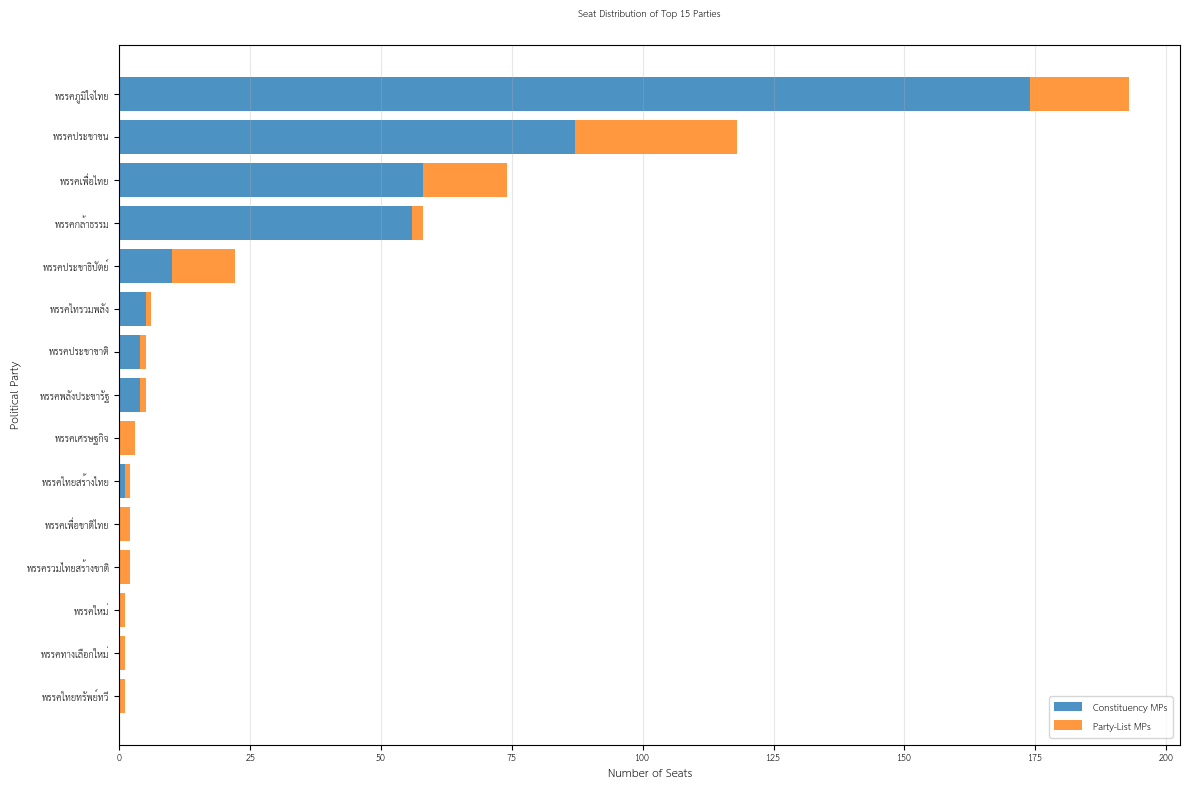

In [102]:
# Plot 1: Seat Distribution by Party (Top 15 parties with most seats)
plt.figure(figsize=(12, 8))

# Select only parties that won seats
party_with_seats = party_standings[party_standings["totalSeats"] > 0].copy()
party_with_seats = party_with_seats.sort_values("totalSeats", ascending=True)

# Create stacked bar separating constituency and party-list MPs
colors = ["#1f77b4", "#ff7f0e"]
plt.barh(
    party_with_seats["partyName"][-15:],
    party_with_seats["constituencySeats"][-15:],
    label="Constituency MPs",
    color=colors[0],
    alpha=0.8,
)
plt.barh(
    party_with_seats["partyName"][-15:],
    party_with_seats["partyListSeats"][-15:],
    left=party_with_seats["constituencySeats"][-15:],
    label="Party-List MPs",
    color=colors[1],
    alpha=0.8,
)

plt.xlabel("Number of Seats", fontsize=12, fontproperties=thai_font)
plt.ylabel("Political Party", fontsize=12, fontproperties=thai_font)
plt.title("Seat Distribution of Top 15 Parties", fontsize=14, fontproperties=thai_font, pad=20)
plt.legend(loc="lower right", prop=thai_font)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

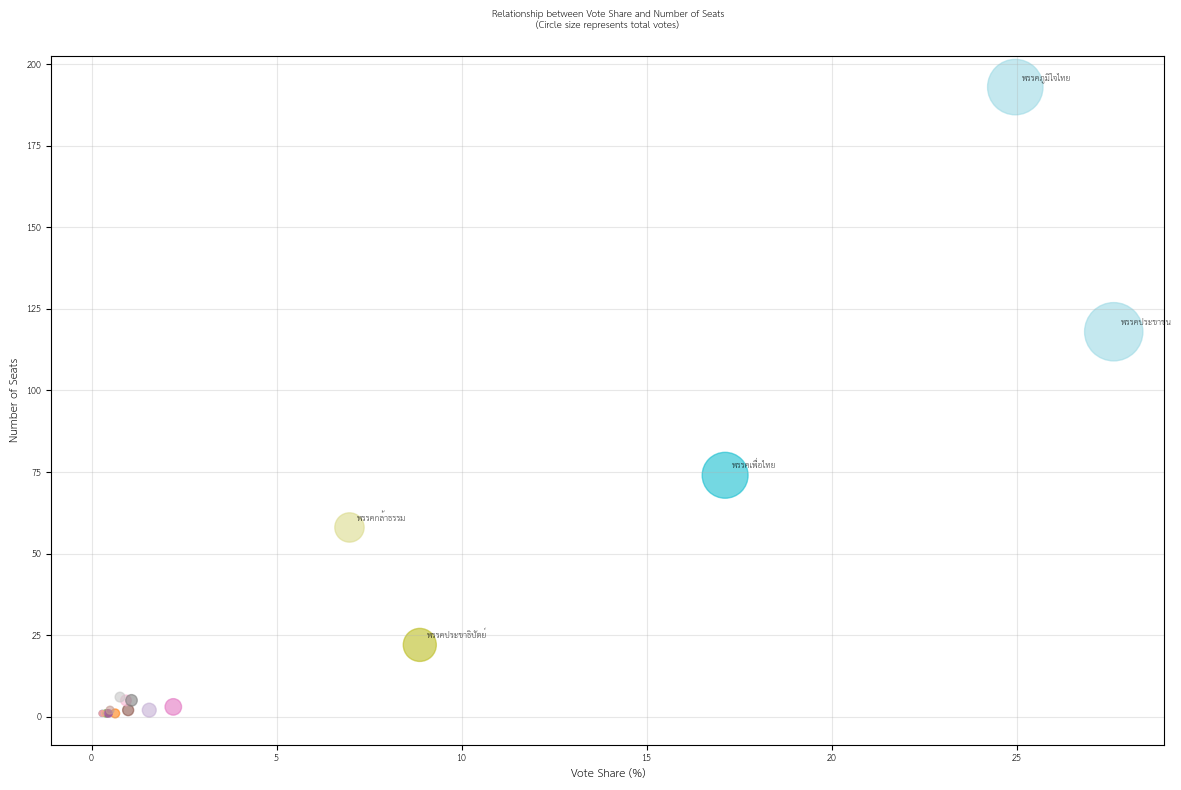


Table: Electoral Efficiency of Each Party (Votes per Seat)


'             Party  Total Votes  Seats  Votes per Seat  % Votes\n      พรรคกล้าธรรม      4449389     58           76714        7\n     พรรคไทรวมพลัง       493742      6           82290        1\n     พรรคภูมิใจไทย     15927763    193           82527       25\n  พรรคพลังประชารัฐ       592925      5          118585        1\n     พรรคประชาชาติ       690286      5          138057        1\n      พรรคเพื่อไทย     10923700     74          147618       17\n       พรรคประชาชน     17619788    118          149320       28\n   พรรคไทยสร้างไทย       321718      2          160859        0\n  พรรคทางเลือกใหม่       175625      1          175625        0\nพรรครวมพลังประชาชน       183956      1          183956        0'

In [103]:
plt.figure(figsize=(12, 8))

party_with_seats["votes_per_seat"] = (
    party_with_seats["total_votes"] / party_with_seats["totalSeats"]
)
party_with_seats["votes_per_seat"] = party_with_seats["votes_per_seat"].replace([np.inf], np.nan)

scatter = plt.scatter(
    party_with_seats["vote_share_percent"],
    party_with_seats["totalSeats"],
    s=party_with_seats["total_votes"] / 10000,  # Size based on total votes
    alpha=0.6,
    c=range(len(party_with_seats)),
    cmap="tab20",
)

for idx, row in party_with_seats.iterrows():
    if row["totalSeats"] >= 10:
        plt.annotate(
            row["partyName"],
            (row["vote_share_percent"], row["totalSeats"]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=9,
            fontproperties=thai_font,
            alpha=0.8,
        )

plt.xlabel("Vote Share (%)", fontsize=12, fontproperties=thai_font)
plt.ylabel("Number of Seats", fontsize=12, fontproperties=thai_font)
plt.title(
    "Relationship between Vote Share and Number of Seats\n(Circle size represents total votes)",
    fontsize=14,
    fontproperties=thai_font,
    pad=20,
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display table of electoral efficiency
print("\nTable: Electoral Efficiency of Each Party (Votes per Seat)")
print("=" * 80)
efficiency_df = party_with_seats[
    ["partyName", "total_votes", "totalSeats", "votes_per_seat", "vote_share_percent"]
].copy()
efficiency_df.columns = ["Party", "Total Votes", "Seats", "Votes per Seat", "% Votes"]
efficiency_df = efficiency_df.sort_values("Votes per Seat")
display(efficiency_df.head(10).to_string(index=False, float_format="%.0f"))

### 3.2 Constituency-Level Patterns

Let's explore how competitive the races were in each constituency and the patterns of winning.

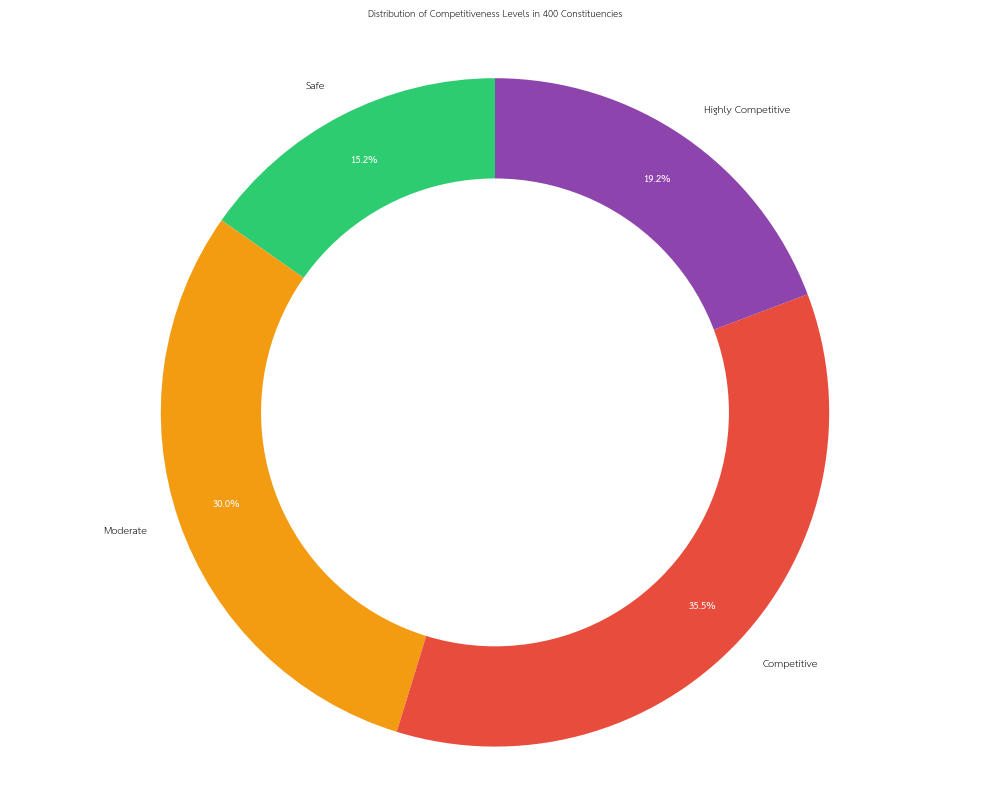


Table: Summary of Election Competitiveness Levels


'Competitiveness Level  Number of Constituencies Percentage\n                 Safe                        61      15.2%\n             Moderate                       120      30.0%\n          Competitive                       142      35.5%\n   Highly Competitive                        77      19.2%'

In [104]:
# Plot 3: Competitiveness Categories
plt.figure(figsize=(10, 8))

# Count constituencies in each competitiveness level
comp_counts = constituency_analysis["competitiveness"].value_counts()

# DefinROR lors and order to match categories created in preprocessing
comp_order = ["Safe", "Moderate", "Competitive", "Highly Competitive"]
comp_colors = ["#2ecc71", "#f39c12", "#e74c3c", "#8e44ad"]

plot_values = [comp_counts.get(c, 0) for c in comp_order]
if sum(plot_values) == 0:
    plot_values = [1, 0, 0, 0]

# Create donut chart
wedges, texts, autotexts = plt.pie(
    plot_values,
    labels=comp_order,
    colors=comp_colors,
    autopct="%1.1f%%",
    startangle=90,
    pctdistance=0.85,
)

# Create center circle for donut style
centre_circle = plt.Circle((0, 0), 0.70, fc="white")
plt.gca().add_artist(centre_circle)

# Improve text readability
for text in texts:
    text.set_fontproperties(thai_font)
    text.set_fontsize(11)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color("white")
    autotext.set_weight("bold")

plt.title(
    "Distribution of Competitiveness Levels in 400 Constituencies",
    fontsize=14,
    fontproperties=thai_font,
    pad=20,
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Display summary table
print("\nTable: Summary of Election Competitiveness Levels")
print("=" * 60)
comp_summary = pd.DataFrame(
    {
        "Competitiveness Level": comp_order,
        "Number of Constituencies": [comp_counts.get(c, 0) for c in comp_order],
        "Percentage": [
            f"{(comp_counts.get(c, 0) / len(constituency_analysis) * 100):.1f}%" for c in comp_order
        ],
    }
)
display(comp_summary.to_string(index=False))

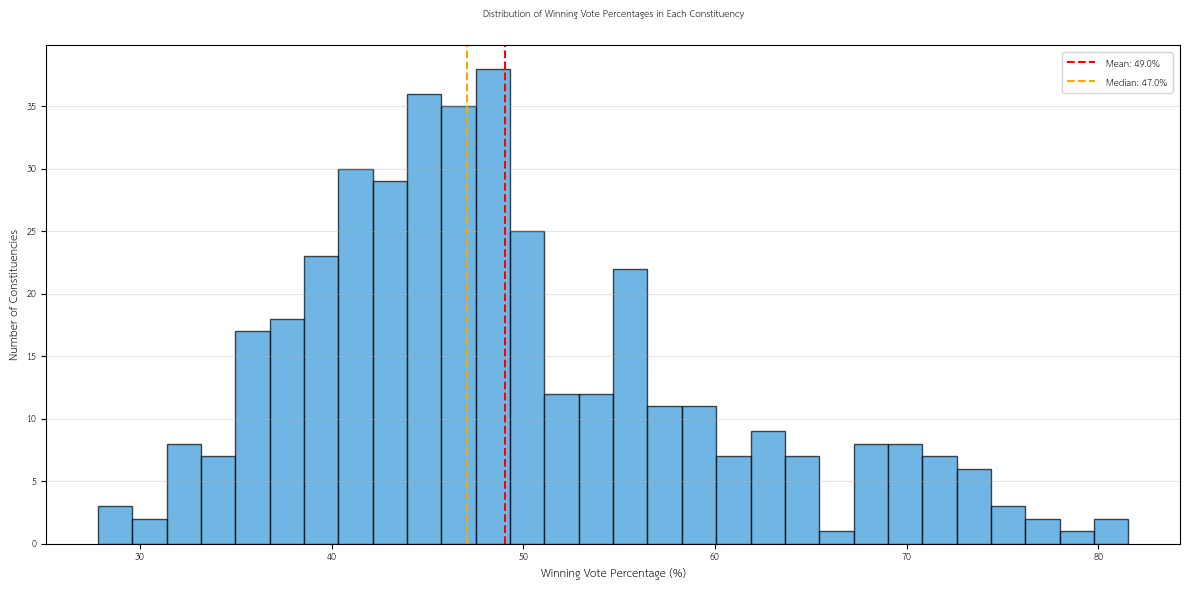


Summary Statistics of Winning Vote Percentages:


'         Statistic  Value\n           Minimum 27.80%\n           Maximum 81.58%\n              Mean 49.04%\n            Median 47.05%\nStandard Deviation 10.59%'

In [105]:
# Plot 4: Distribution of Winning Vote Percentages
plt.figure(figsize=(12, 6))

# Histogram of winner_percent
plt.hist(master_table["winner_percent"], bins=30, color="#3498db", alpha=0.7, edgecolor="black")
plt.axvline(
    master_table["winner_percent"].mean(),
    color="red",
    linestyle="--",
    label=f"Mean: {master_table['winner_percent'].mean():.1f}%",
)
plt.axvline(
    master_table["winner_percent"].median(),
    color="orange",
    linestyle="--",
    label=f"Median: {master_table['winner_percent'].median():.1f}%",
)

plt.xlabel("Winning Vote Percentage (%)", fontsize=12, fontproperties=thai_font)
plt.ylabel("Number of Constituencies", fontsize=12, fontproperties=thai_font)
plt.title(
    "Distribution of Winning Vote Percentages in Each Constituency",
    fontsize=14,
    fontproperties=thai_font,
    pad=20,
)
plt.legend(prop=thai_font)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Summary statistics
print("\nSummary Statistics of Winning Vote Percentages:")
print("=" * 50)
stats_df = pd.DataFrame(
    {
        "Statistic": ["Minimum", "Maximum", "Mean", "Median", "Standard Deviation"],
        "Value": [
            f"{master_table['winner_percent'].min():.2f}%",
            f"{master_table['winner_percent'].max():.2f}%",
            f"{master_table['winner_percent'].mean():.2f}%",
            f"{master_table['winner_percent'].median():.2f}%",
            f"{master_table['winner_percent'].std():.2f}%",
        ],
    }
)
display(stats_df.to_string(index=False))

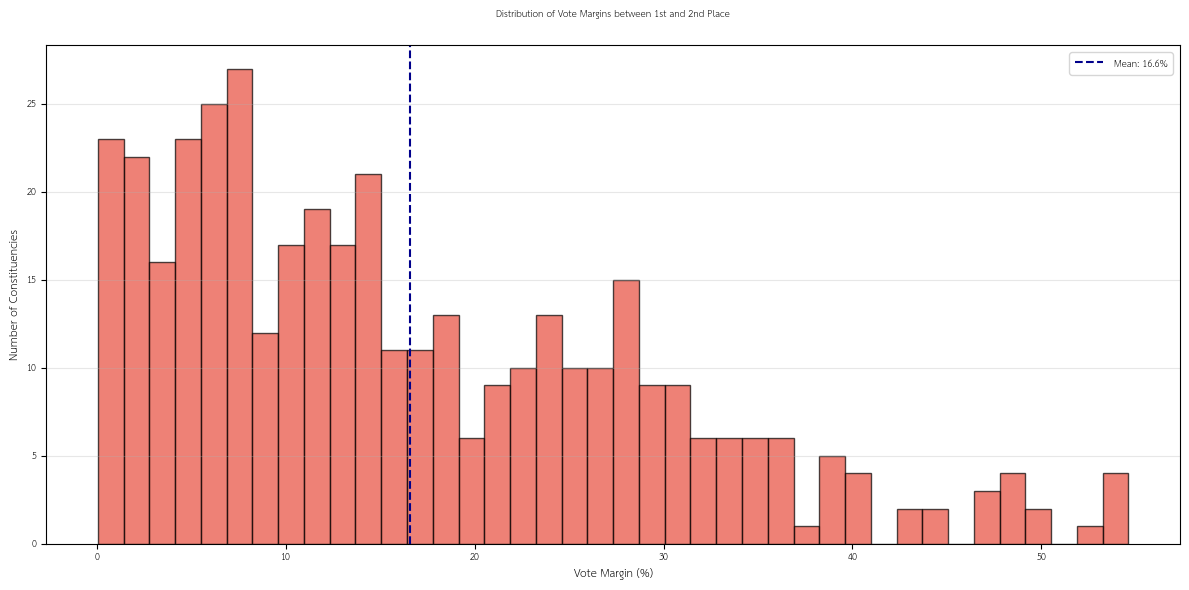


Table: Top 10 Most Competitive Constituencies (Smallest Vote Margins)


'   Province  District                   Winner            Party  % Margin  1st Votes  2nd Votes\n นครราชสีมา         5  สมเกียรติ ตันดิลกตระกูล     พรรคเพื่อไทย      0.04      37213      21258\n     ลพบุรี         3 กาญจนาพร จิระพันธุ์วาณิช    พรรคภูมิใจไทย      0.04      46398      21594\n    ขอนแก่น        11     องอาจ ฉัตรชัยพลรัตน์    พรรคภูมิใจไทย      0.05      47777      19537\nอุบลราชธานี         3       พิมพกาญจน์ พลสมัคร    พรรคไทรวมพลัง      0.20      41261      17330\nหนองบัวลำภู         3          พรณรงค์ นิลนะมะ     พรรคกล้าธรรม      0.25      24943      19070\n    ปัตตานี         2              คอซีย์ มามุ    พรรคภูมิใจไทย      0.41      36360      16527\n   เชียงราย         4  สุรสิทธิ์ เจียมวิจักษณ์     พรรคกล้าธรรม      0.44      31901      25865\nอุบลราชธานี         2         ณรงค์ชัย วีระกุล    พรรคไทรวมพลัง      0.52      33858      15504\n  อุตรดิตถ์         3            รวี เล็กอุทัย     พรรคเพื่อไทย      0.60      38074      20614\n    หนองคาย         1     กระ

In [106]:
# Plot 5: Distribution of Vote Margins
plt.figure(figsize=(12, 6))

# Histogram of vote_margin_percent
plt.hist(
    master_table["vote_margin_percent"], bins=40, color="#e74c3c", alpha=0.7, edgecolor="black"
)
plt.axvline(
    master_table["vote_margin_percent"].mean(),
    color="darkblue",
    linestyle="--",
    label=f"Mean: {master_table['vote_margin_percent'].mean():.1f}%",
)

plt.xlabel("Vote Margin (%)", fontsize=12, fontproperties=thai_font)
plt.ylabel("Number of Constituencies", fontsize=12, fontproperties=thai_font)
plt.title(
    "Distribution of Vote Margins between 1st and 2nd Place",
    fontsize=14,
    fontproperties=thai_font,
    pad=20,
)
plt.legend(prop=thai_font)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Display top 10 most competitive constituencies
print("\nTable: Top 10 Most Competitive Constituencies (Smallest Vote Margins)")
print("=" * 90)
closest_races = master_table.nsmallest(10, "vote_margin_percent")[
    [
        "province",
        "district",
        "winner_name",
        "winner_party_name",
        "vote_margin_percent",
        "winner_votes",
        "runner_up_votes",
    ]
].copy()
closest_races.columns = [
    "Province",
    "District",
    "Winner",
    "Party",
    "% Margin",
    "1st Votes",
    "2nd Votes",
]
display(closest_races.to_string(index=False, float_format="%.2f"))

### 3.3 Referendum Insights

Explore the voting behavior of eligible voters in the referendum and its relationship to the election.

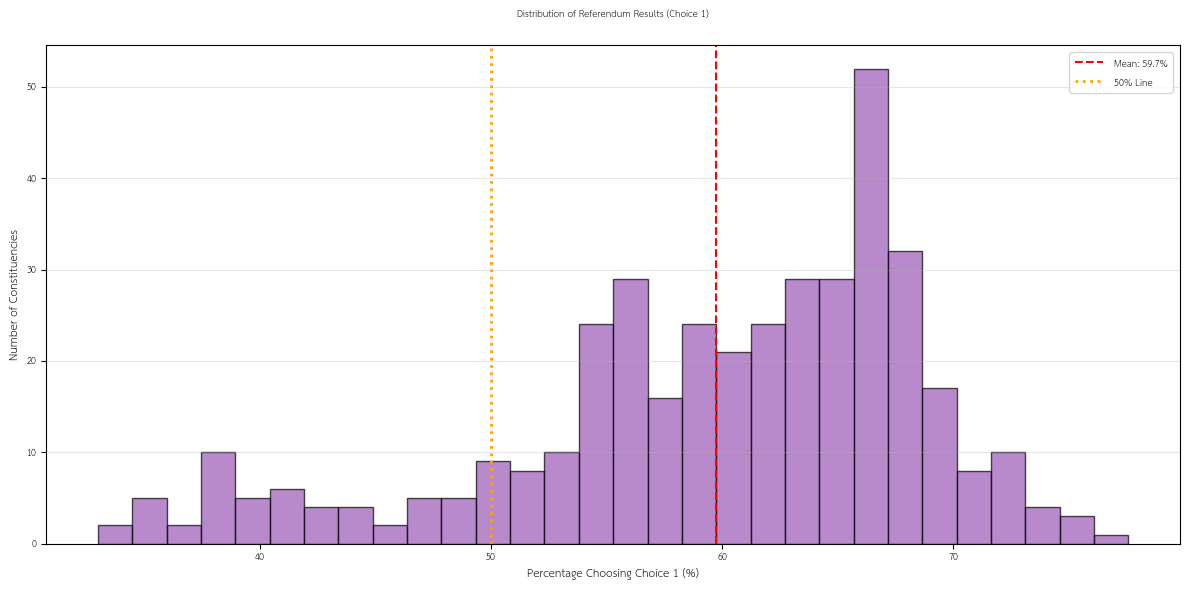


Referendum Results Summary:


'               Choice  Total Votes Percentage\n             Choice 1 19,937,620.0     59.77%\nOther Choices (2+3+4) 13,417,174.0     40.23%'

In [107]:
# Plot 6: Distribution of Referendum Results (Choice 1 vs Others)
plt.figure(figsize=(12, 6))

# Calculate percentage choosing 1
map_transformed["choice1_percent"] = (
    map_transformed["ref_เห็นชอบ_votes"] / map_transformed["total_referendum_votes"] * 100
)

# Histogram of percentage choosing 1
plt.hist(map_transformed["choice1_percent"], bins=30, color="#9b59b6", alpha=0.7, edgecolor="black")
plt.axvline(
    map_transformed["choice1_percent"].mean(),
    color="red",
    linestyle="--",
    label=f"Mean: {map_transformed['choice1_percent'].mean():.1f}%",
)
plt.axvline(50, color="orange", linestyle=":", linewidth=2, label="50% Line")

plt.xlabel("Percentage Choosing Choice 1 (%)", fontsize=12, fontproperties=thai_font)
plt.ylabel("Number of Constituencies", fontsize=12, fontproperties=thai_font)
plt.title(
    "Distribution of Referendum Results (Choice 1)", fontsize=14, fontproperties=thai_font, pad=20
)
plt.legend(prop=thai_font)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Summary of referendum results
print("\nReferendum Results Summary:")
print("=" * 60)
total_choice1 = map_transformed["ref_เห็นชอบ_votes"].sum()
total_not_choice1 = map_transformed["total_referendum_votes"].sum() - total_choice1
total_ref_votes = total_choice1 + total_not_choice1

ref_summary = pd.DataFrame(
    {
        "Choice": ["Choice 1", "Other Choices (2+3+4)"],
        "Total Votes": [f"{total_choice1:,}", f"{total_not_choice1:,}"],
        "Percentage": [
            f"{total_choice1 / total_ref_votes * 100:.2f}%",
            f"{total_not_choice1 / total_ref_votes * 100:.2f}%",
        ],
    }
)
display(ref_summary.to_string(index=False))

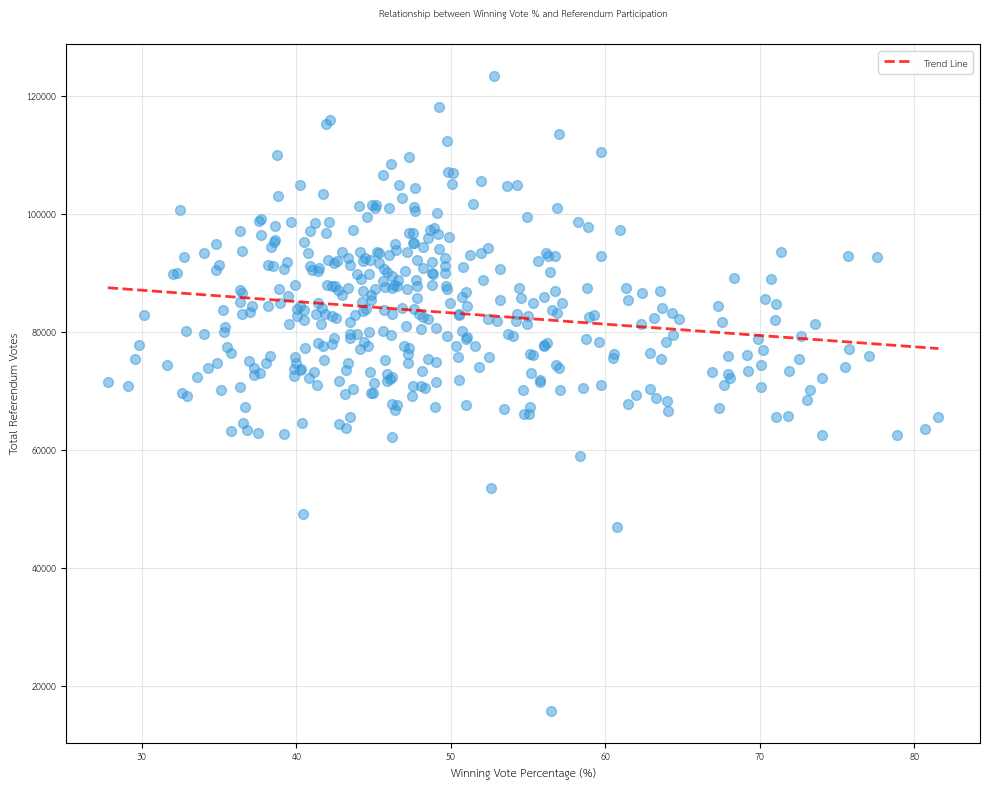


Correlation Coefficient: -0.1660

Interpretation:
- Close to 1: Strong positive correlation
- Close to 0: No correlation
- Close to -1: Strong negative correlation


In [108]:
# Plot 7: Relationship between Winning Vote % and Referendum Participation
plt.figure(figsize=(10, 8))

# Scatter plot
plt.scatter(
    master_table["winner_percent"],
    master_table["total_referendum_votes"],
    alpha=0.5,
    c="#3498db",
    s=50,
)

# Trend line
x_vals = master_table["winner_percent"]
y_vals = master_table["total_referendum_votes"]
z = np.polyfit(x_vals, y_vals, 1)
p = np.poly1d(z)
plt.plot(
    x_vals.sort_values(),
    p(x_vals.sort_values()),
    "r--",
    alpha=0.8,
    linewidth=2,
    label="Trend Line",
)

plt.xlabel("Winning Vote Percentage (%)", fontsize=12, fontproperties=thai_font)
plt.ylabel("Total Referendum Votes", fontsize=12, fontproperties=thai_font)
plt.title(
    "Relationship between Winning Vote % and Referendum Participation",
    fontsize=14,
    fontproperties=thai_font,
    pad=20,
)
plt.legend(prop=thai_font)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = master_table["winner_percent"].corr(master_table["total_referendum_votes"])
print(f"\nCorrelation Coefficient: {correlation:.4f}")
print("\nInterpretation:")
print("- Close to 1: Strong positive correlation")
print("- Close to 0: No correlation")
print("- Close to -1: Strong negative correlation")

### 3.4 Provincial Analysis

Explore the patterns of elections in each province to see how they differ.

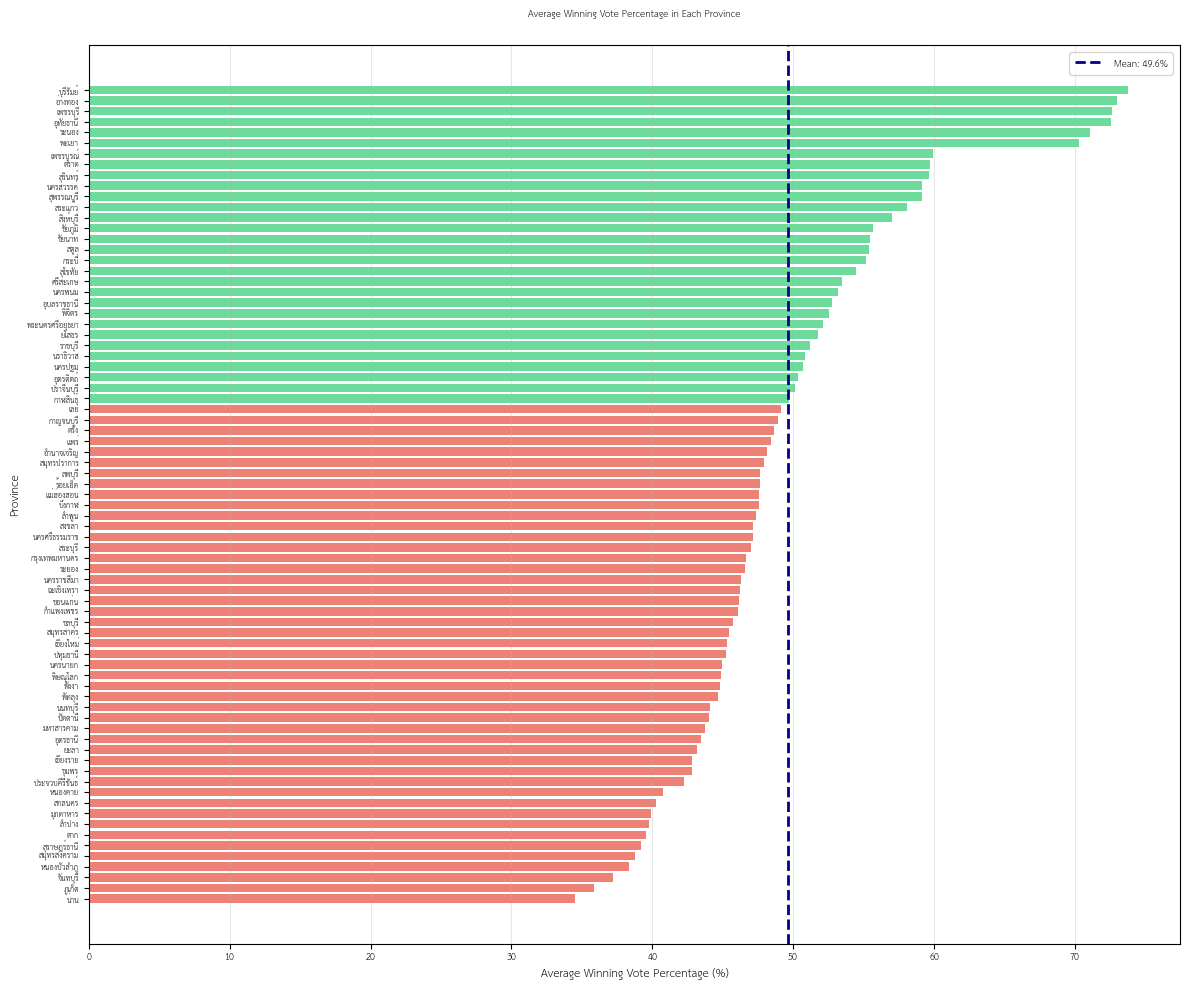


Top 5 Provinces with Highest Average Winning %:


'              % Winning  Number of Districts\nprovinceName                                \nบุรีรัมย์         73.77                   10\nอ่างทอง           73.02                    2\nเพชรบุรี          72.61                    3\nอุทัยธานี         72.59                    2\nระนอง             71.07                    1'


Bottom 5 Provinces with Lowest Average Winning %:


'              % Winning  Number of Districts\nprovinceName                                \nน่าน              34.49                    3\nภูเก็ต            35.83                    3\nจันทบุรี          37.23                    3\nหนองบัวลำภู       38.36                    3\nสมุทรสงคราม       38.79                    1'

In [109]:
# Plot 8: Distribution of Average Winning Vote % by Province
plt.figure(figsize=(12, 10))

# Build province metric from available columns
province_metric = (
    master_table.groupby("provinceName")["winner_percent"].mean().rename("avg_winning_percent")
)
province_counts = master_table.groupby("provinceName").size().rename("num_constituencies")
province_turnout_like = pd.concat([province_metric, province_counts], axis=1).sort_values(
    "avg_winning_percent", ascending=True
)

# Horizontal bar chart
colors = [
    "#e74c3c" if x < province_turnout_like["avg_winning_percent"].mean() else "#2ecc71"
    for x in province_turnout_like["avg_winning_percent"]
]

plt.barh(
    range(len(province_turnout_like)),
    province_turnout_like["avg_winning_percent"],
    color=colors,
    alpha=0.7,
)
plt.yticks(range(len(province_turnout_like)), province_turnout_like.index, fontsize=8)
plt.axvline(
    province_turnout_like["avg_winning_percent"].mean(),
    color="darkblue",
    linestyle="--",
    linewidth=2,
    label=f"Mean: {province_turnout_like['avg_winning_percent'].mean():.1f}%",
)

plt.xlabel("Average Winning Vote Percentage (%)", fontsize=12, fontproperties=thai_font)
plt.ylabel("Province", fontsize=12, fontproperties=thai_font)
plt.title(
    "Average Winning Vote Percentage in Each Province",
    fontsize=14,
    fontproperties=thai_font,
    pad=20,
)
plt.legend(prop=thai_font)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

# Display top 5 and bottom 5 provinces by this metric
print("\nTop 5 Provinces with Highest Average Winning %:")
print("=" * 50)
top5_turnout = province_turnout_like.nlargest(5, "avg_winning_percent")[
    ["avg_winning_percent", "num_constituencies"]
].copy()
top5_turnout.columns = ["% Winning", "Number of Districts"]
display(top5_turnout.to_string(float_format="%.2f"))

print("\nBottom 5 Provinces with Lowest Average Winning %:")
print("=" * 50)
bottom5_turnout = province_turnout_like.nsmallest(5, "avg_winning_percent")[
    ["avg_winning_percent", "num_constituencies"]
].copy()
bottom5_turnout.columns = ["% Winning", "Number of Districts"]
display(bottom5_turnout.to_string(float_format="%.2f"))

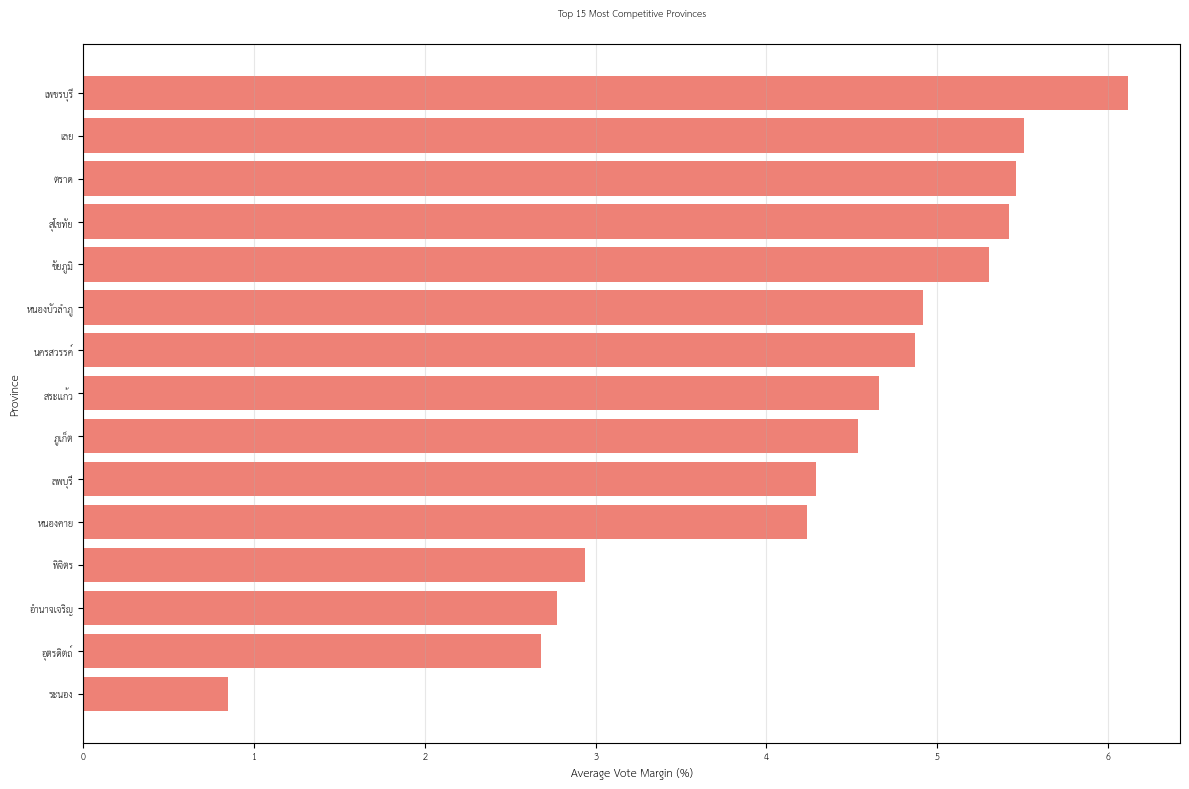


Table: Top 10 Most Competitive Provinces


'              Avg % Margin  Number of Districts  Number of Winning Parties\nprovinceName                                                              \nระนอง                 0.85                    1                          1\nอุตรดิตถ์             2.68                    3                          3\nอำนาจเจริญ            2.77                    2                          1\nพิจิตร                2.94                    3                          1\nหนองคาย               4.24                    3                          2\nลพบุรี                4.29                    4                          2\nภูเก็ต                4.54                    3                          2\nสระแก้ว               4.66                    3                          2\nนครสวรรค์             4.87                    6                          2\nหนองบัวลำภู           4.92                    3                          2'

In [ ]:
# Plot 9: Top 15 Most Competitive Provinces (by avg_margin_percent)
plt.figure(figsize=(12, 8))

# Select 15 provinces with lowest avg_margin_percent (most competitive)
competitive_provinces = province_summary.nsmallest(15, "avg_margin_percent").sort_values(
    "avg_margin_percent", ascending=True
)

plt.barh(
    range(len(competitive_provinces)),
    competitive_provinces["avg_margin_percent"],
    color="#e74c3c",
    alpha=0.7,
)
plt.yticks(range(len(competitive_provinces)), competitive_provinces.index, fontsize=10)

plt.xlabel("Average Vote Margin (%)", fontsize=12, fontproperties=thai_font)
plt.ylabel("Province", fontsize=12, fontproperties=thai_font)
plt.title("Top 15 Most Competitive Provinces", fontsize=14, fontproperties=thai_font, pad=20)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

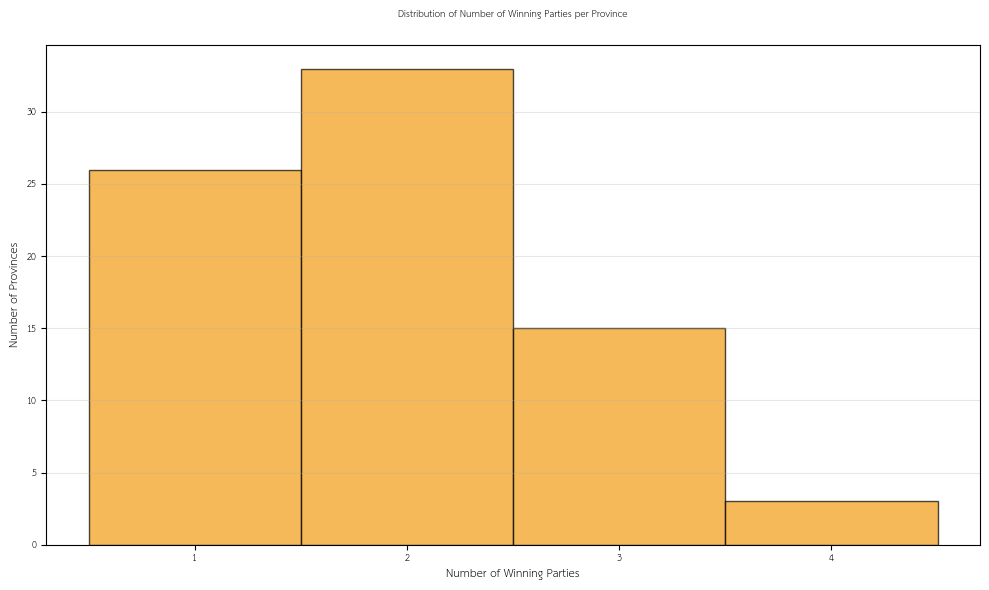


Summary of Winning Parties Distribution by Province:


' Number of Winning Parties  Number of Provinces Percentage\n                         1                   26      33.8%\n                         2                   33      42.9%\n                         3                   15      19.5%\n                         4                    3       3.9%'


Provinces with the Most Winning Parties (4 parties): ขอนแก่น, ร้อยเอ็ด, สุราษฎร์ธานี


In [ ]:
# Plot 10: Distribution of number of winning parties in each province
plt.figure(figsize=(10, 6))

# Histogram of unique_parties
plt.hist(
    province_summary["unique_parties"],
    bins=range(1, province_summary["unique_parties"].max() + 2),
    color="#f39c12",
    alpha=0.7,
    edgecolor="black",
    align="left",
)

plt.xlabel("Number of Winning Parties", fontsize=12, fontproperties=thai_font)
plt.ylabel("Number of Provinces", fontsize=12, fontproperties=thai_font)
plt.title(
    "Distribution of Number of Winning Parties per Province",
    fontsize=14,
    fontproperties=thai_font,
    pad=20,
)
plt.xticks(range(1, province_summary["unique_parties"].max() + 1))
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# Show provinces with most winning parties
max_parties = province_summary["unique_parties"].max()
provinces_max = province_summary[province_summary["unique_parties"] == max_parties].index.tolist()
print(
    f"\nProvinces with the Most Winning Parties ({max_parties} parties): {', '.join(provinces_max[:10])}"
)
if len(provinces_max) > 10:
    print(f"and {len(provinces_max) - 10} more provinces")

### 3.5 Party Performance Analysis

Study the efficiency and winning patterns of each political party.

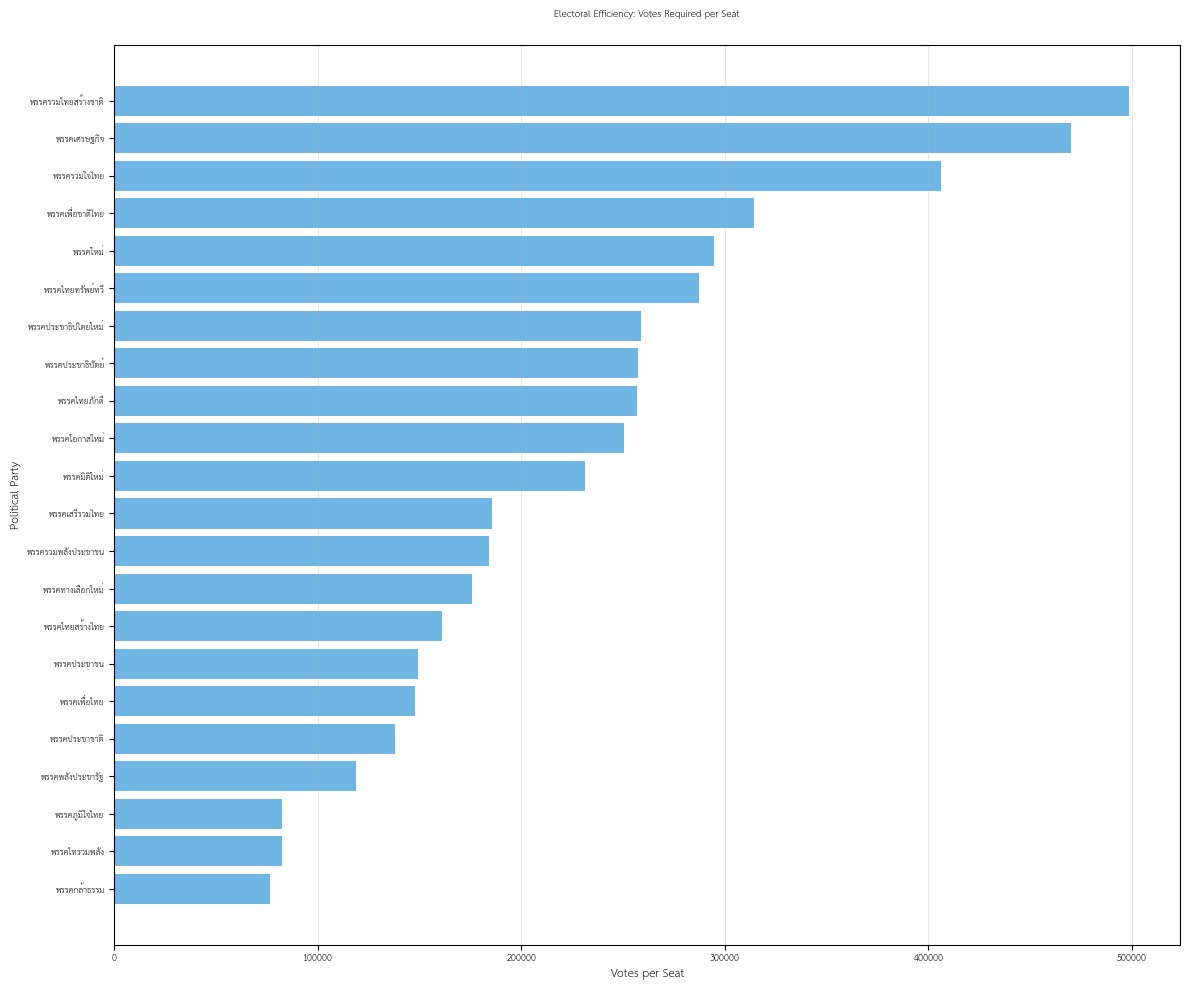


Top 10 Most Efficient Parties (Lowest Votes per Seat):


'             Party  Total Votes  Seats  Votes per Seat\n      พรรคกล้าธรรม      4449389     58           76714\n     พรรคไทรวมพลัง       493742      6           82290\n     พรรคภูมิใจไทย     15927763    193           82527\n  พรรคพลังประชารัฐ       592925      5          118585\n     พรรคประชาชาติ       690286      5          138057\n      พรรคเพื่อไทย     10923700     74          147618\n       พรรคประชาชน     17619788    118          149320\n   พรรคไทยสร้างไทย       321718      2          160859\n  พรรคทางเลือกใหม่       175625      1          175625\nพรรครวมพลังประชาชน       183956      1          183956'


Bottom 10 Least Efficient Parties (Highest Votes per Seat):


'              Party  Total Votes  Seats  Votes per Seat\n      พรรคโอกาสใหม่       250264      1          250264\n       พรรคไทยภักดี       256732      1          256732\n   พรรคประชาธิปัตย์      5660461     22          257294\nพรรคประชาธิปไตยใหม่       258623      1          258623\n   พรรคไทยทรัพย์ทวี       287201      1          287201\n           พรรคใหม่       294892      1          294892\n   พรรคเพื่อชาติไทย       628952      2          314476\n       พรรครวมใจไทย       406309      1          406309\n       พรรคเศรษฐกิจ      1410886      3          470295\nพรรครวมไทยสร้างชาติ       997515      2          498758'

In [ ]:
# Plot 11: Electoral Efficiency (votes per seat) of Each Party
plt.figure(figsize=(12, 10))

# Sort by votes per seat
efficiency_sorted = party_with_seats.sort_values("votes_per_seat", ascending=True)

# Show only parties with seats
plt.barh(
    range(len(efficiency_sorted)), efficiency_sorted["votes_per_seat"], color="#3498db", alpha=0.7
)
plt.yticks(range(len(efficiency_sorted)), efficiency_sorted["partyName"], fontsize=9)

plt.xlabel("Votes per Seat", fontsize=12, fontproperties=thai_font)
plt.ylabel("Political Party", fontsize=12, fontproperties=thai_font)
plt.title(
    "Electoral Efficiency: Votes Required per Seat", fontsize=14, fontproperties=thai_font, pad=20
)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

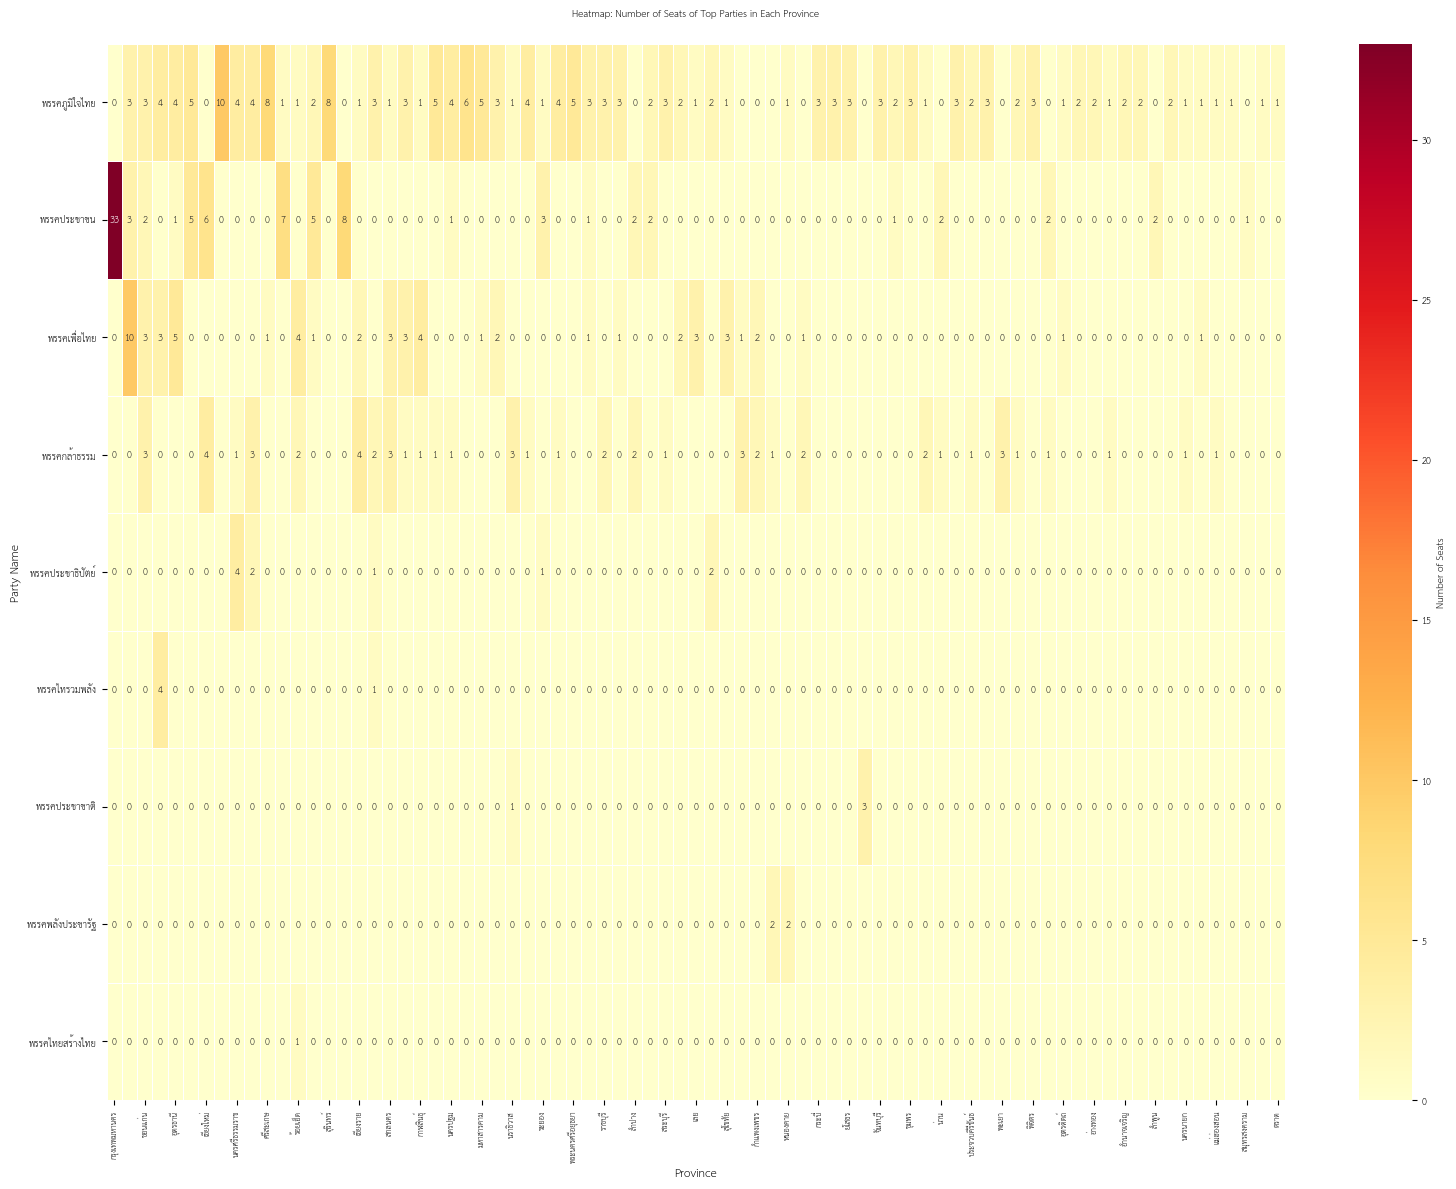


Table: Number of Provinces Each Party Won at Least 1 Seat


'      Party Name  Number of Provinces Won\n   พรรคภูมิใจไทย                       63\n    พรรคกล้าธรรม                       31\n    พรรคเพื่อไทย                       23\n     พรรคประชาชน                       19\nพรรคประชาธิปัตย์                        5\n   พรรคไทรวมพลัง                        2\n   พรรคประชาชาติ                        2\nพรรคพลังประชารัฐ                        2\n พรรคไทยสร้างไทย                        1'

In [ ]:
# Plot 12: Heatmap of Winning Parties in Each Province (Top 10 Parties)
plt.figure(figsize=(16, 12))

# Select top parties and keep only those present in constituency winners pivot
top_parties = party_standings.nlargest(10, "totalSeats")["partyName"].tolist()
available_top_parties = [p for p in top_parties if p in party_province_pivot.columns]

# Create pivot table for heatmap
heatmap_data = party_province_pivot[available_top_parties].fillna(0)

# Create heatmap
sns.heatmap(
    heatmap_data.T,
    cmap="YlOrRd",
    annot=True,
    fmt=".0f",
    cbar_kws={"label": "Number of Seats"},
    linewidths=0.5,
)

plt.xlabel("Province", fontsize=12, fontproperties=thai_font)
plt.ylabel("Party Name", fontsize=12, fontproperties=thai_font)
plt.title(
    "Heatmap: Number of Seats of Top Parties in Each Province",
    fontsize=14,
    fontproperties=thai_font,
    pad=20,
)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

### 3.6 Key Findings Summary

Summarize the key findings from the exploratory data analysis.

In [116]:
print("\n1. Election Overview:")
print(f"   - Total political parties participating: {len(party_standings)} parties")
print(f"   - Parties that won seats: {len(party_with_seats)} parties")
print(f"   - Total constituencies: {len(master_table)} constituencies")

top_party = party_with_seats.loc[party_with_seats["totalSeats"].idxmax()]
print(f"\n2. Winning Parties:")
print(f"   - Party with most seats: {top_party['partyName']} ({top_party['totalSeats']} seats)")
print(f"   - Vote share: {top_party['vote_share_percent']:.2f}%")

print("\n3. Election Competitiveness Level:")
comp_dist = constituency_analysis["competitiveness"].value_counts()
for comp_type, count in comp_dist.items():
    print(f"   - {comp_type}: {count} constituencies ({count / len(master_table) * 100:.1f}%)")

print("\n5. Referendum Voting:")
if "choice1_percent" not in map_transformed.columns:
    map_transformed["choice1_percent"] = (
        map_transformed["ref_เห็นชอบ_votes"] / map_transformed["total_referendum_votes"] * 100
    )
print(
    f"   - Average percentage choosing Choice 1: {map_transformed['choice1_percent'].mean():.2f}%"
)

print("\n6. Interesting Findings:")
most_efficient = party_with_seats.loc[party_with_seats["votes_per_seat"].idxmin()]
print(
    f"   - Most efficient party: {most_efficient['partyName']} ({most_efficient['votes_per_seat']:.0f} votes per seat)"
)

# Find province with most winning parties
most_diverse = province_summary.loc[province_summary["unique_parties"].idxmax()]
most_diverse_name = province_summary[
    province_summary["unique_parties"] == province_summary["unique_parties"].max()
].index[0]
print(
    f"   - Province with highest political diversity: {most_diverse_name} ({most_diverse['unique_parties']} winning parties)"
)

# Closest constituency
closest = master_table.loc[master_table["vote_margin_percent"].idxmin()]
print(
    f"   - Closest competition constituency: {closest['provinceName']} district {closest['number']} (margin {closest['vote_margin_percent']:.2f}%)"
)


1. Election Overview:
   - Total political parties participating: 60 parties
   - Parties that won seats: 22 parties
   - Total constituencies: 400 constituencies

2. Winning Parties:
   - Party with most seats: พรรคภูมิใจไทย (193 seats)
   - Vote share: 24.96%

3. Election Competitiveness Level:
   - Competitive: 142 constituencies (35.5%)
   - Moderate: 120 constituencies (30.0%)
   - Highly Competitive: 77 constituencies (19.2%)
   - Safe: 61 constituencies (15.2%)

5. Referendum Voting:
   - Average percentage choosing Choice 1: 59.73%

6. Interesting Findings:
   - Most efficient party: พรรคกล้าธรรม (76714 votes per seat)
   - Province with highest political diversity: ขอนแก่น (4 winning parties)
   - Closest competition constituency: นครราชสีมา district 5 (margin 0.04%)
